In [163]:
import pandas as pd
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline 

from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [137]:
pva_data = pd.read_csv('donors.csv')

C:\Users\Frederico Rodrigues\anaconda3\envs\datamininglab\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [138]:
pva_data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [139]:
del pva_data['Unnamed: 0']
pva_data.dtypes

ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object

In [140]:
# duplicated observations
pva_data.duplicated().sum()

0

In [141]:
pva_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TCODE,95412.0,54.223117,953.844476,0.000000,0.000000,1.000000,2.000000,72002.0
NUMCHLD,12386.0,1.527773,0.806861,1.000000,1.000000,1.000000,2.000000,7.0
INCOME,74126.0,3.886248,1.854960,1.000000,2.000000,4.000000,5.000000,7.0
WEALTH1,50680.0,5.345699,2.742490,0.000000,3.000000,6.000000,8.000000,9.0
HIT,95412.0,3.321438,9.306899,0.000000,0.000000,0.000000,3.000000,241.0
...,...,...,...,...,...,...,...,...
TIMELAG,85439.0,8.093739,8.213242,0.000000,4.000000,6.000000,11.000000,1088.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0
CONTROLN,95412.0,95778.176959,55284.596094,1.000000,47910.750000,95681.500000,143643.500000,191779.0
HPHONE_D,95412.0,0.500618,0.500002,0.000000,0.000000,1.000000,1.000000,1.0


In [142]:
pva_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
pva_data.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'AVGGIFT', 'CONTROLN', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object', length=475)

In [144]:
# Finding the percentage of NaN's in each column
percent_missing = pva_data.isnull().sum() * 100 / len(pva_data)
missing_value = pd.DataFrame({'Column Name': pva_data.columns,'Percentage Missing': percent_missing})
missing_value.sort_values('Percentage Missing', inplace=True)
# Printing the top 10 columns with biggest NaN values percentage
print(missing_value.tail(10))

         Column Name  Percentage Missing
RAMNT_15    RAMNT_15           92.388798
RDATE_15    RDATE_15           92.388798
RAMNT_6      RAMNT_6           99.186685
RDATE_6      RDATE_6           99.186685
RAMNT_4      RAMNT_4           99.705488
RDATE_4      RDATE_4           99.705488
RDATE_3      RDATE_3           99.746363
RAMNT_3      RAMNT_3           99.746363
RDATE_5      RDATE_5           99.990567
RAMNT_5      RAMNT_5           99.990567


In [145]:
pva_data.corr()

,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
TCODE,1.000000,0.003457,-0.005683,-0.006437,-0.002897,-0.001160,-0.006312,-0.004113,-0.003759,-0.004298,...,0.027063,0.026508,-0.012115,0.001127,-0.000010,0.004964,-0.005778,-0.001920,-0.002025,0.007835
NUMCHLD,0.003457,1.000000,0.022066,0.025711,0.003927,0.028935,-0.007479,-0.006664,-0.008620,0.024599,...,-0.023929,-0.021063,-0.018695,-0.010425,-0.002989,-0.011415,-0.018747,0.004462,0.024972,0.019857
INCOME,-0.005683,0.022066,1.000000,0.456094,0.004738,-0.007168,-0.035434,0.007814,0.018775,0.043737,...,-0.124218,-0.106561,0.096302,0.072044,0.091475,0.025956,0.114931,0.066211,-0.029094,-0.079972
WEALTH1,-0.006437,0.025711,0.456094,1.000000,0.020244,-0.003759,-0.024914,0.008433,0.040931,0.055357,...,-0.083288,-0.065309,0.072440,0.055056,0.067108,0.017545,0.086482,-0.027074,-0.017367,-0.052808
HIT,-0.002897,0.003927,0.004738,0.020244,1.000000,0.273154,0.190401,0.516363,0.280819,0.374718,...,0.043545,0.044594,-0.029573,-0.002322,-0.007213,0.008685,-0.014705,0.000420,0.213498,-0.000448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIMELAG,0.004964,-0.011415,0.025956,0.017545,0.008685,0.001517,0.002419,0.006022,0.004416,0.005385,...,-0.110699,-0.101840,0.073466,0.032012,0.073174,1.000000,0.077111,0.019095,0.008872,-0.132972
AVGGIFT,-0.005778,-0.018747,0.114931,0.086482,-0.014705,-0.016241,-0.027719,0.015487,0.026210,-0.001544,...,-0.256992,-0.268607,0.754563,0.766810,0.784187,0.077111,1.000000,0.011507,-0.044323,-0.277168
CONTROLN,-0.001920,0.004462,0.066211,-0.027074,0.000420,-0.001785,-0.017925,0.005684,0.003236,0.028591,...,-0.129263,-0.081800,0.040790,-0.011947,-0.000427,0.019095,0.011507,1.000000,-0.108747,-0.016545
HPHONE_D,-0.002025,0.024972,-0.029094,-0.017367,0.213498,0.018020,0.013237,0.026608,0.003245,0.023108,...,0.036087,0.048156,-0.048413,-0.023070,-0.029196,0.008872,-0.044323,-0.108747,1.000000,0.007607


In [146]:
# Creating a copy to apply...
pva_copy = pva_data.copy()

In [147]:
def replaceX(a_column):
    pva_copy[a_column] = pva_copy[a_column].str.replace('X','1')
    pva_copy[a_column] = pva_copy[a_column].str.replace(' ','0')

In [148]:
replaceX('NOEXCH')
replaceX('RECINHSE')
replaceX('RECP3')
replaceX('RECPGVG')
replaceX('RECSWEEP')
replaceX('MAJOR')
replaceX('PEPSTRFL')

In [149]:
#pd.set_option('display.max_columns', None)

In [150]:
# Splitting feature names into groups
non_metric_features = pva_data.select_dtypes(include=['object']).columns
metric_features = pva_data.select_dtypes(exclude=['object']).columns

In [151]:
# Confirming that no variable was left behind
len(metric_features) + len(non_metric_features)

475

In [152]:
pva_copy[metric_features]

,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,31,14,5.0,12.0,10.0,4.0,7.741935,95515,0,4
1,1,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,...,3,1,10.0,25.0,25.0,18.0,15.666667,148535,0,2
2,1,NaN,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,...,27,14,2.0,16.0,5.0,12.0,7.481481,15078,1,4
3,0,NaN,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,...,16,7,2.0,11.0,10.0,9.0,6.812500,172556,1,4
4,0,1.0,3.0,2.0,60,1.0,0.0,9.0,0.0,4.0,...,37,8,3.0,15.0,15.0,14.0,6.864865,7112,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,1,0,25.0,25.0,25.0,NaN,25.000000,184568,0,1
95408,1,1.0,7.0,9.0,1,0.0,0.0,1.0,0.0,0.0,...,1,0,20.0,20.0,20.0,NaN,20.000000,122706,1,1
95409,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,7,4,3.0,10.0,10.0,3.0,8.285714,189641,1,3
95410,0,NaN,7.0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,41,18,5.0,21.0,18.0,4.0,12.146341,4693,1,4


In [153]:
pva_copy['NUMCHLD'].fillna(0, inplace=True)
pva_copy.fillna(pva_copy.median(), inplace=True)

In [154]:
# Correlation list
c = pva_copy.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-362:-352])

HHD7    HHD9      0.980778
HHD9    HHD7      0.980778
POP903  POP901    0.981225
POP901  POP903    0.981225
        POP902    0.988491
POP902  POP901    0.988491
ETHC5   ETH2      0.989670
ETH2    ETHC5     0.989670
HV1     HV2       0.993412
HV2     HV1       0.993412
dtype: float64


In [155]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [156]:
#Principal Feature Analysis: 

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X) # calculation Cov matrix is embeded in PCA
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
# Usage
pfa = PFA(n_features=5)
pfa.fit(pva_copy[metric_features])
# To get the transformed matrix
x = pfa.features_
print(x)
# To get the column indices of the kept features
column_indices = pfa.indices_
print(column_indices)

[[-0.52569325  0.73805498 -0.51969042 -0.35374343 -0.39418534]
 [ 4.31186051 -0.11046819 -0.62008504 -0.73128819  0.06183323]
 [-0.61963658  0.131967   -0.21850656 -0.16497106  0.65209781]
 ...
 [-0.79802335 -0.83777377 -0.4192958   1.53398035 -0.47079786]
 [ 1.39961726  0.0107494  -0.82087427  0.02380132 -0.26289936]
 [-0.08869843 -0.23168579 -0.21850656 -0.54251581  0.1182479 ]]
[98, 52, 104, 112, 27]


In [158]:
test1 = pva_copy[metric_features].iloc[:,column_indices]
test1

,HV2,AGE902,HU4,HHD7,POP901
0,635,48,4,6,992
1,5218,41,3,4,3611
2,546,43,7,7,7001
3,1263,40,7,6,640
4,594,45,3,20,2520
...,...,...,...,...,...
95407,1025,35,11,12,27380
95408,1723,40,3,2,1254
95409,377,35,5,16,552
95410,2459,42,1,8,1746


# Data exploration
## -Pandas profiling 

In [199]:
profile = ProfileReport(
    pva_copy.sample(frac=.30),
    minimal = True,
    title='PVA',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)


In [200]:
profile.to_file(output_file='output_file.html')

# Clustering

In [171]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(test1)
print(scaled_features[:3])

[[-0.52569325  0.73805498 -0.51969042 -0.35374343 -0.39418534]
 [ 4.31186051 -0.11046819 -0.62008504 -0.73128819  0.06183323]
 [-0.61963658  0.131967   -0.21850656 -0.16497106  0.65209781]]


In [174]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_features)
    distortions.append(kmeanModel.inertia_)

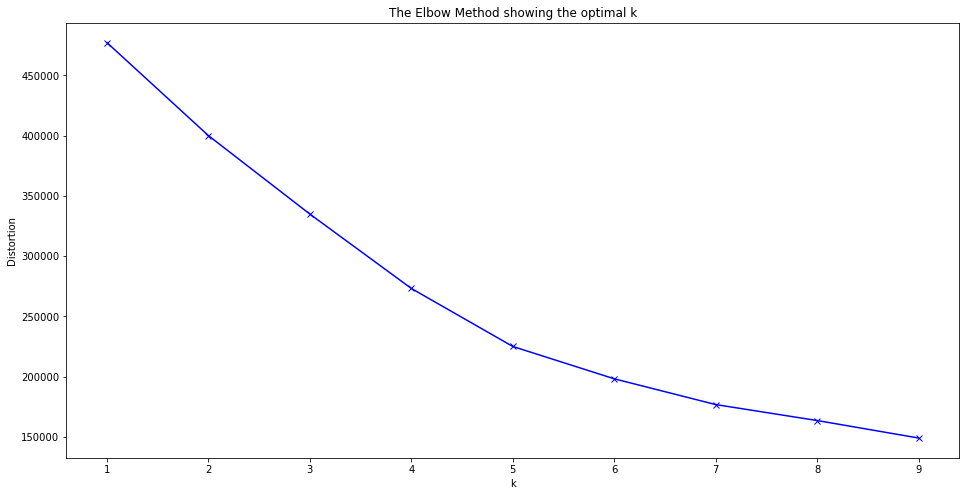

In [175]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [177]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [178]:
kmeans.cluster_centers_

array([[ 2.18801041e+00,  8.64601695e-02, -3.66125596e-01,
        -5.19462614e-01, -1.50173217e-01],
       [-4.26883683e-01, -5.05114007e-01, -8.02112853e-05,
         1.88231139e+00, -1.73429011e-01],
       [-1.78479163e-01,  1.40489507e+00,  2.09467755e+00,
        -5.92411339e-01, -1.00661277e-01],
       [ 1.12662240e-02, -2.90786904e-01, -1.11851841e-01,
         2.86016486e-01,  4.52181368e+00],
       [-2.93979189e-01, -1.24387778e-01, -2.71509078e-01,
        -2.26808012e-01, -1.49194881e-01]])

In [194]:
km_labels = pd.Series(kmeans.labels_, name='labels')

In [197]:
# Characterizing the final clusters
df_concat = pd.concat((pva_copy[metric_features], km_labels), axis=1)
df_concat.groupby('labels').mean()

,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
labels,,,,,,,,,,,,,,,,,,,,,
0,52.657706,0.171326,4.873208,6.741667,3.511918,0.050986,0.011649,0.467742,0.044444,0.232975,...,8.630645,4.616308,9.350197,22.694125,19.856944,8.129570,15.556440,130602.189964,0.395968,1.790502
1,53.164941,0.235137,3.400706,4.387686,3.096235,0.062196,0.023059,0.486275,0.020000,0.180784,...,9.127529,4.641412,8.018672,19.251230,16.965362,7.767294,13.076481,97192.915765,0.464235,1.895294
2,63.421377,0.099087,3.575957,5.171710,2.818135,0.053749,0.022259,0.402093,0.024618,0.151503,...,10.405888,5.538004,7.414235,20.059826,16.999228,7.908914,13.021620,88449.233152,0.477075,1.950969
3,60.381426,0.138972,3.882587,5.764511,1.698176,0.038143,0.012604,0.246103,0.014925,0.101161,...,9.615257,4.948922,8.677556,21.311997,18.109861,7.672637,14.325045,93958.327363,0.315423,1.921061
4,52.907453,0.214989,3.897034,5.794086,3.500987,0.076118,0.031309,0.535071,0.028619,0.210988,...,9.755490,5.158671,7.694090,19.573043,16.916502,7.854592,12.991014,90164.482499,0.541813,1.928615
